## An attempt to quantify the number of available faculty positions in astronomy across subfields over the years. This analysis considers only the number of mentions of specific subfields ("cosmology," "planet," "data," "observational," "gravitational waves") as reported on the Astro Rumor Mill website.

## #To-do: extend analysis using LLMs.

In [1]:
urls  = ["https://www.astrobetter.com/wiki/Rumor+Mill+Faculty-Staff", 
         "https://www.astrobetter.com/wiki/Rumor+Mill+Faculty-Staff+2023-2024",
         "https://www.astrobetter.com/wiki/Rumor+Mill+Faculty-Staff+2022-2023",
         "https://www.astrobetter.com/wiki/Rumor+Mill+Faculty-Staff+2021-2022",
         "https://www.astrobetter.com/wiki/Rumor+Mill+Faculty-Staff+2020-2021",
         "https://www.astrobetter.com/wiki/Rumor+Mill+Faculty-Staff+2019-2020",
         "https://www.astrobetter.com/wiki/Rumor+Mill+Faculty-Staff+2018-2019",
         "https://www.astrobetter.com/wiki/Rumor+Mill+2017-2018+Faculty-Staff",
         "https://www.astrobetter.com/wiki/Rumor+Mill+2016-2017+Faculty-Staff",
         "https://www.astrobetter.com/wiki/Rumor+Mill+2015-2016+Faculty-Staff",
         "https://www.astrobetter.com/wiki/tiki-index.php?page=Rumor+Mill+2014-2015+Faculty-Staff",
         "https://www.astrobetter.com/wiki/tiki-index.php?page=Rumor+Mill+2013-2014+Faculty-Staff",
         "https://www.astrobetter.com/wiki/Rumor+Mill+2012-2013+Faculty-Staff",
         "https://www.astrobetter.com/wiki/Rumor+Mill+2011-2012+Faculty-Staff"]

years = list(range(2025,2011,-1))
sub_fields = ["cosmology", "planet", "data", "observational", "gravitational waves", "particle"]

In [2]:
import requests
from bs4 import BeautifulSoup
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    # Add any other headers as needed
}
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [3]:
n = len(years)
def list_dict():
    return [0] * n
results = defaultdict(list_dict)
total   = []
for i in range(n): # loop through years
    print (i, years[i])
    response = requests.get(urls[i], headers=headers)
    if response.status_code == 200: 
        
        soup = BeautifulSoup(response.text, 'html.parser')
        table  = soup.find('table').find_all('td')
        total.append(len(table)/2) # ignore column to avoid double counting jobs
        
        for j in range(len(table)): # loop through the table
            text = table[j].get_text(separator=" ", strip=True)
            for field in sub_fields: # loop through fields    
                if field in text.lower():
                    results[field][i]+=1

print (results, total)

0 2025
1 2024
2 2023
3 2022
4 2021
5 2020
6 2019
7 2018
8 2017
9 2016
10 2015
11 2014
12 2013
13 2012
defaultdict(<function list_dict at 0x10f7265f0>, {'planet': [9, 8, 12, 17, 10, 15, 8, 12, 8, 10, 7, 9, 16, 6], 'observational': [4, 7, 7, 3, 1, 3, 5, 8, 5, 1, 2, 4, 1, 2], 'data': [2, 1, 3, 7, 0, 3, 1, 3, 2, 0, 1, 1, 1, 0], 'particle': [1, 3, 4, 4, 0, 1, 5, 3, 2, 0, 2, 4, 1, 2], 'cosmology': [5, 6, 7, 7, 4, 1, 8, 10, 7, 1, 4, 6, 7, 5], 'gravitational waves': [1, 3, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0]}) [53.0, 99.0, 117.0, 119.0, 76.5, 96.0, 121.0, 126.5, 114.0, 134.0, 123.0, 109.0, 149.0, 129.5]


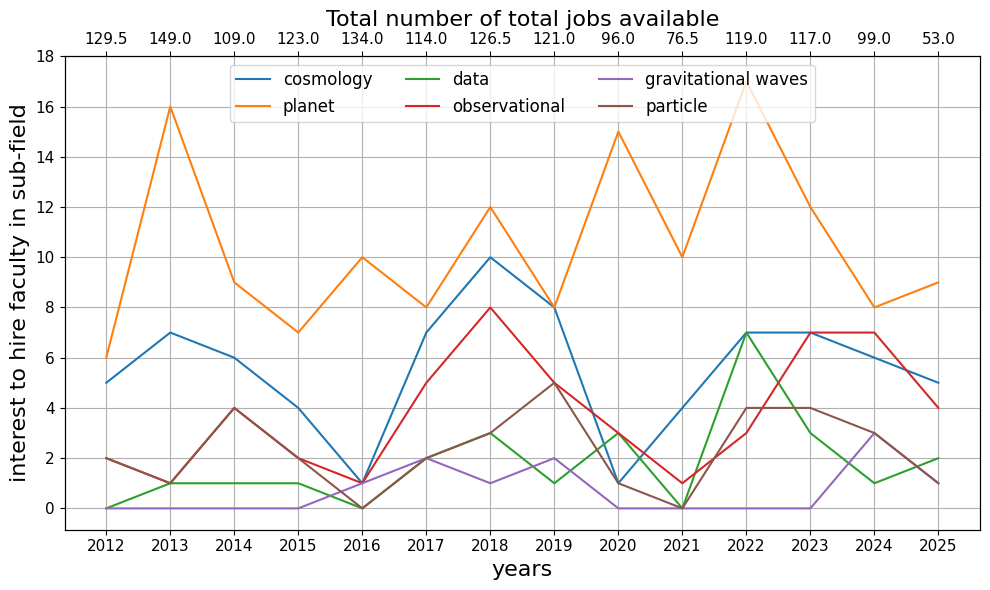

In [4]:
fig, ax = plt.subplots(1, figsize=(10,6))

for i in range(len(results)):
    ax.plot(years, results[sub_fields[i]], label=sub_fields[i])


ax.legend(loc='upper center', fontsize=12,ncol=3)
ax.set_xlabel("years",fontsize=16)
ax.set_ylabel("interest to hire faculty in sub-field",fontsize=16)
ax.set_xticks(years)
ax.set_yticks(range(0,20,2))

# display total number of jobs in top-axis
ax1 = ax.twiny()
ax1.set_xlim(ax.get_xlim())
ax1.set_xticks(ax.get_xticks())
ax1.set_xticklabels(total)
ax1.set_xlabel('Total number of total jobs available', fontsize=16)
ax1.xaxis.set_tick_params(labelsize=11)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.grid(True)
plt.tight_layout()
plt.show()